In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import sys
import numpy as np
import glob
import torch

sys.path.insert(1,"/home/showalte/research/prob_seq_queries/")
from seq_queries.utils import read_pkl, write_pkl
from seq_queries.data import *

In [3]:
df= load_mooc_data('../../data/moocs/mooc.csv', None)

AttributeError: 'NoneType' object has no attribute 'needs_encoding'

In [38]:
df.head()

,user_id,item_id,timestamp,state_label,f1,f2,f3,f4
0,0,0,0.0,0,-0.319991,-0.435701,0.106784,-0.067309
1,0,1,6.0,0,-0.319991,-0.435701,0.106784,-0.067309
2,0,2,41.0,0,-0.319991,-0.435701,0.106784,-0.067309
3,0,1,49.0,0,-0.319991,-0.435701,0.106784,-0.067309
4,0,2,51.0,0,-0.319991,-0.435701,0.106784,-0.067309


In [60]:
vocab = set(df.item_id.drop_duplicates().values)
vocab.add("<BOS>")  # beginning of sequence
df = df.sort_values(by=['user_id','timestamp'])
df_list = stratify_data_by_user(df[['user_id','item_id']])
write_pkl(df_list,'mooc_df_list.pkl')
# df_sequences = get_user_sequences(df_list,15)

In [59]:
np.array(df_sequences).shape

(318170, 15)

In [45]:
lens = np.array([len(d) for d in df_list])

In [49]:
(lens>15).sum()/lens.shape[0]

0.7171444791370991

(array([1.197e+03, 6.940e+02, 4.670e+02, 3.920e+02, 2.940e+02, 3.000e+02,
        2.490e+02, 2.480e+02, 2.280e+02, 1.960e+02, 1.870e+02, 1.820e+02,
        1.450e+02, 1.430e+02, 1.450e+02, 1.360e+02, 1.330e+02, 1.220e+02,
        1.150e+02, 1.230e+02, 1.090e+02, 9.600e+01, 1.180e+02, 8.900e+01,
        8.300e+01, 6.200e+01, 7.300e+01, 6.100e+01, 6.500e+01, 5.000e+01,
        5.500e+01, 5.400e+01, 4.600e+01, 3.500e+01, 3.600e+01, 3.800e+01,
        2.900e+01, 3.100e+01, 2.900e+01, 2.500e+01, 1.500e+01, 1.000e+01,
        1.800e+01, 1.300e+01, 1.100e+01, 1.300e+01, 7.000e+00, 1.100e+01,
        6.000e+00, 6.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 5.000e+00,
        7.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+0

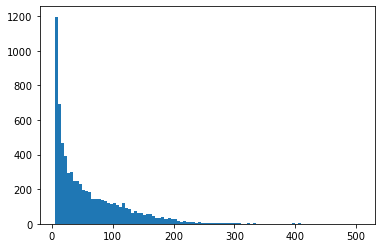

In [55]:
import matplotlib.pyplot as plt
plt.hist(lens,bins=100)

In [21]:
df.iloc[0]

user_id                             0.000000
item_id                            -0.319991
timestamp                          -0.435701
state_label                         0.106784
comma_separated_list_of_features   -0.067309
Name: 0, dtype: float64

In [23]:
df.head()

,user_id,item_id,timestamp,state_label,comma_separated_list_of_features
0,0,-0.319991,-0.435701,0.106784,-0.067309
1,0,-0.319991,-0.435701,0.106784,-0.067309
2,0,-0.319991,-0.435701,0.106784,-0.067309
3,0,-0.319991,-0.435701,0.106784,-0.067309
4,0,-0.319991,-0.435701,0.106784,-0.067309
